#  Convolutional Neural Network on CIFAR10 Dataset
This project is one of my Deep Learning projects. For this project, we have the [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset that contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images.

The goal of this project is to create a Convolutional Neural Network (CNN) to classify CIFAR images.

In [1]:
# Import the libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Data
We can import and load the CIFAR10 dataset directly from TensorFlow. Loading the dataset returns four NumPy arrays:
- The train_images and train_labels arrays are the training set, which is the data the model uses to learn.
- The model is tested against the test set, the test_images, and test_labels arrays.

In [2]:
# Load the data
cifar = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

Each image is mapped to a single label. Since the class names are not included with the dataset, we will create a list to store these class names.

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## Preprocessing the Data
Since the pixel values of the images fall in the range of 0 to 255, we need to normalize the pixel values to be between 0 and 1.

In [4]:
# Divide the values by 255
train_images, test_images = train_images / 255, test_images / 255

To verify that the data is in the correct format, let's display the first 25 images from the training set along with the class name below each image.

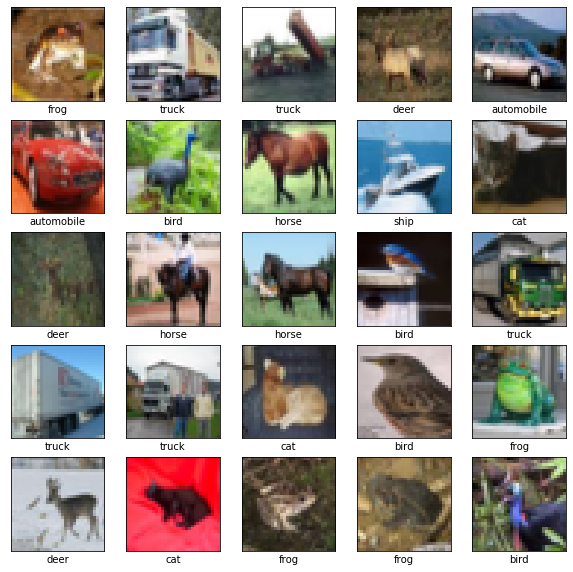

In [14]:
# Plot the first 25 images in the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Building the Model
Now, we can build the neural network by configuring the layers of the model and compiling the model.

### Configuring the Layers
The CNN will mainly consist of a stack of `keras.layers.Conv2D` and `keras.layers.MaxPooling2D` layers. To complete our model, we will use `keras.layers.Flatten` to transform the 3D output to 1D, then add a `keras.layers.Dense` layer on top. Since CIFAR has 10 output classes, we will use a final `keras.layers.Dense` layer with 10 outputs and a softmax activation.

In [6]:
# Configure the layers
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

Let's display the architecture of our model.

In [7]:
# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

### Compiling the Model
Before training the model, we need to compile the model with the following settings:
- Loss function: This measures how accurate the model is during training. For the loss function, we are going to use the sparse categorical cross entropy.
- Optimizer: This is how the model is updated based on the data it sees and its loss function. We are going to use Adam, which is an optimization algorithm based on adaptive estimation of first-order and second-order moments.
- Metrics: Used to monitor the training and testing steps. Here we will use accuracy, the fraction of the images that are correctly classified.

In [8]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Fitting the Model
Now, we can use the `model.fit` method to fits the model to the training data.

In [9]:
# Fit the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.4997 - accuracy: 0.4541 - val_loss: 1.2251 - val_accuracy: 0.5605
Epoch 2/10
50000/50000 [==============================] - 78s 2ms/sample - loss: 1.1208 - accuracy: 0.6049 - val_loss: 1.1227 - val_accuracy: 0.6053
Epoch 3/10
50000/50000 [==============================] - 66s 1ms/sample - loss: 0.9743 - accuracy: 0.6570 - val_loss: 0.9596 - val_accuracy: 0.6654
Epoch 4/10
50000/50000 [==============================] - 67s 1ms/sample - loss: 0.8839 - accuracy: 0.6917 - val_loss: 0.8953 - val_accuracy: 0.6886
Epoch 5/10
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.8091 - accuracy: 0.7169 - val_loss: 0.8709 - val_accuracy: 0.7043
Epoch 6/10
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.7541 - accuracy: 0.7340 - val_loss: 0.8422 - val_accuracy: 0.7117
Epoch 7/10
50000/50000 [==============================] 

## Evaluating the Model
Next, we can create a plot to compare how the model performs on the training and test sets

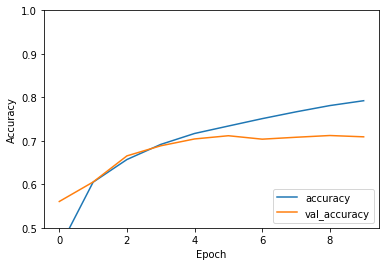

In [10]:
# Create the accuracy plot
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

## Making Predictions
With the model trained, we can now use it to make predictions on some images.

In [11]:
# Make predictions
predictions = model.predict(test_images)

Let's plot several images along with their predictions.

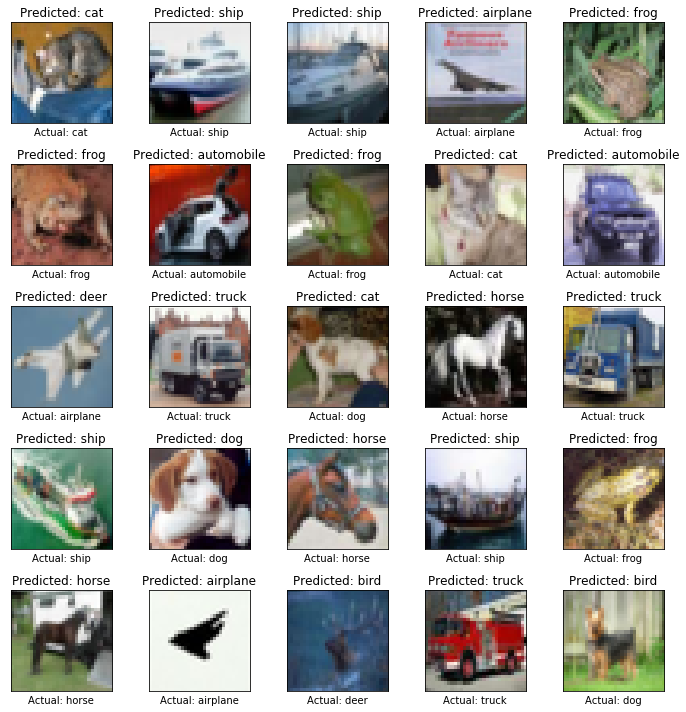

In [13]:
# Plot the images for the first 25 predictions
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.gca().set_title(f'Predicted: {class_names[np.argmax(predictions[i])]}')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(f'Actual: {class_names[test_labels[i][0]]}')
    plt.tight_layout()
plt.show()